Load Packages

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [3]:
end_date = datetime.now()
start_date = datetime(end_date.year-15, end_date.month, end_date.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


Requirement Gathering

In [4]:
stock_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2024-12-27,94164.859375,94164.859375,97294.843750,93310.742188,95704.976562,52419934565
2024-12-28,95163.929688,95163.929688,95525.898438,94014.289062,94160.187500,24107436185
2024-12-29,93530.226562,93530.226562,95174.875000,92881.789062,95174.054688,29635885267
2024-12-30,92643.210938,92643.210938,94903.320312,91317.132812,93527.195312,56188003691
2024-12-31,94505.148438,94505.148438,94726.390625,91979.156250,92619.421875,58383122432


In [5]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100


In [6]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Adj Close,BTC-USD,3759.0,1.958614e+04,2.212749e+04,1.781030e+02,1.226310e+03,9.350529e+03,3.056939e+04,1.061406e+05
Close,BTC-USD,3759.0,1.958614e+04,2.212749e+04,1.781030e+02,1.226310e+03,9.350529e+03,3.056939e+04,1.061406e+05
High,BTC-USD,3759.0,2.000276e+04,2.258300e+04,2.117310e+02,1.242800e+03,9.530519e+03,3.135041e+04,1.082684e+05
Low,BTC-USD,3759.0,1.910330e+04,2.159744e+04,1.715100e+02,1.208440e+03,9.202354e+03,3.005085e+04,1.052917e+05
Open,BTC-USD,3759.0,1.956238e+04,2.209785e+04,1.768970e+02,1.223955e+03,9.349161e+03,3.052615e+04,1.061473e+05
Volume,BTC-USD,3759.0,1.858691e+10,2.034948e+10,5.914570e+06,4.101675e+08,1.464355e+10,2.973720e+10,3.509679e+11


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3759 entries, 2014-09-17 to 2024-12-31
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BTC-USD)  3759 non-null   float64
 1   (Close, BTC-USD)      3759 non-null   float64
 2   (High, BTC-USD)       3759 non-null   float64
 3   (Low, BTC-USD)        3759 non-null   float64
 4   (Open, BTC-USD)       3759 non-null   float64
 5   (Volume, BTC-USD)     3759 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 205.6 KB


In [8]:
stock_data.columns

MultiIndex([('Adj Close', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

Closing Price Calculations

In [9]:
closing_price = stock_data[['Close']]

In [10]:
closing_price

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2024-12-27,94164.859375
2024-12-28,95163.929688


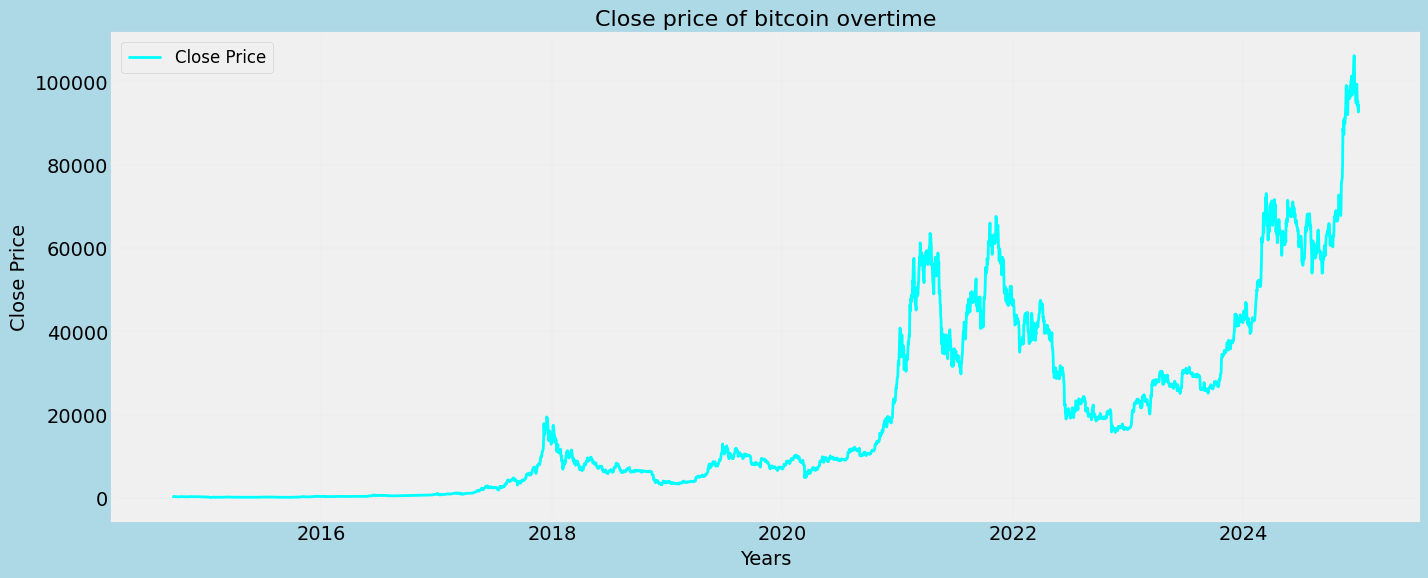

In [11]:
plt.figure(figsize = (15, 6), facecolor = ('lightblue'))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'cyan', linewidth = 2)
plt.title("Close price of bitcoin overtime", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel("Close Price", fontsize = 14)
plt.grid(alpha = 0.3, linewidth = 0.2)
plt.legend(fontsize = 12)
plt.show()

Moving Average of Closing Price

In [12]:
for i in range(2014, 2024):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [13]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

C:\Users\yasee\AppData\Local\Temp\ipykernel_14108\194502310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
C:\Users\yasee\AppData\Local\Temp\ipykernel_14108\194502310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


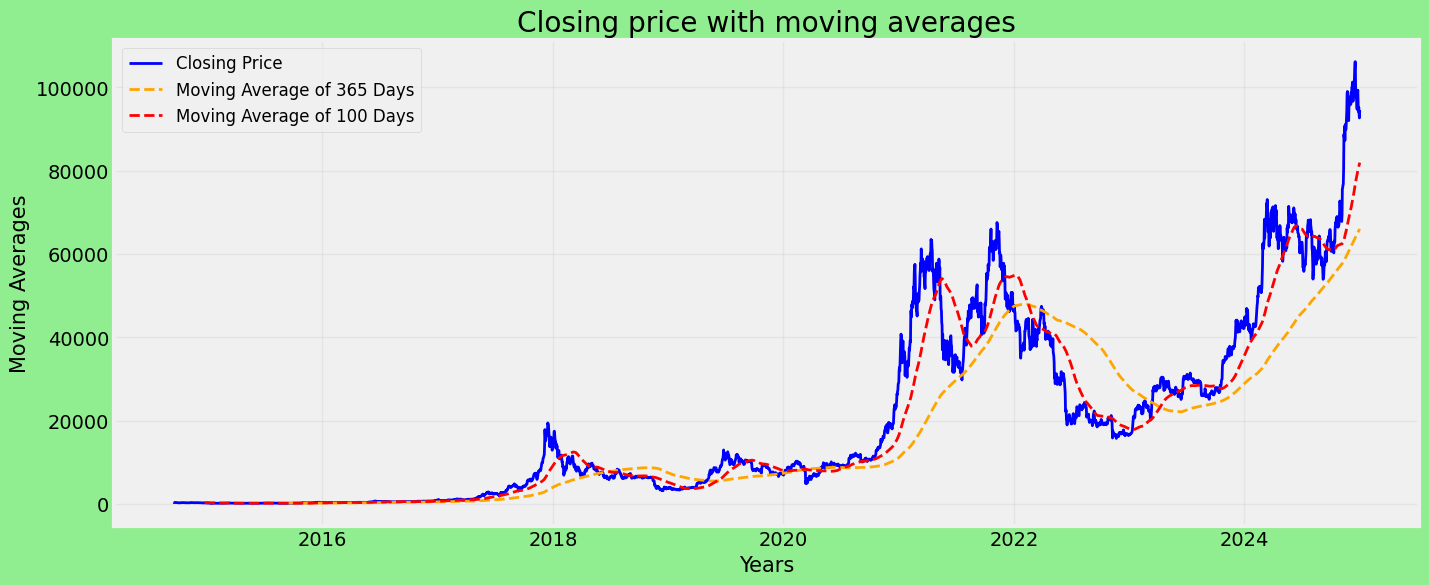

In [14]:
plt.figure(figsize = (15, 6), facecolor = "lightgreen")

plt.plot(closing_price.index, closing_price['Close'], label = "Closing Price", color = "blue", linewidth = 2)
plt.plot(closing_price.index, closing_price['MA_365'], label = "Moving Average of 365 Days", color = "orange", linewidth = 2, linestyle = "--")
plt.plot(closing_price.index, closing_price['MA_100'], label = "Moving Average of 100 Days", color = "red", linestyle = "--", linewidth = 2)

plt.title("Closing price with moving averages")
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Moving Averages", fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)

plt.show()

Long Short Term Memory (LSTM)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [18]:
len(scaled_data)

3759

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [19]:
x_data = []
y_data = []
base_days = 100

for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days : i])
    y_data.append(scaled_data[i])

x_data = np.array(x_data)
y_data = np.array(y_data)

In [20]:
train_size = int(len(x_data) * 0.9)
x_train, y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [21]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

c:\Users\yasee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 60s 85ms/step - loss: 0.0018
Epoch 2/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 67s 102ms/step - loss: 2.1499e-04
Epoch 3/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 106s 139ms/step - loss: 2.9907e-04
Epoch 4/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 80s 121ms/step - loss: 1.3176e-04
Epoch 5/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 62s 93ms/step - loss: 1.2421e-04
Epoch 6/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 42s 64ms/step - loss: 1.1454e-04
Epoch 7/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 1.2577e-04
Epoch 8/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - loss: 1.3359e-04
Epoch 9/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 49s 74ms/step - loss: 9.9923e-05
Epoch 10/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 49s 74ms/step - loss: 1.1129e-04


In [23]:
prediction = model.predict(x_test)
inversed_prediction = scaler.inverse_transform(prediction)
inversed_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


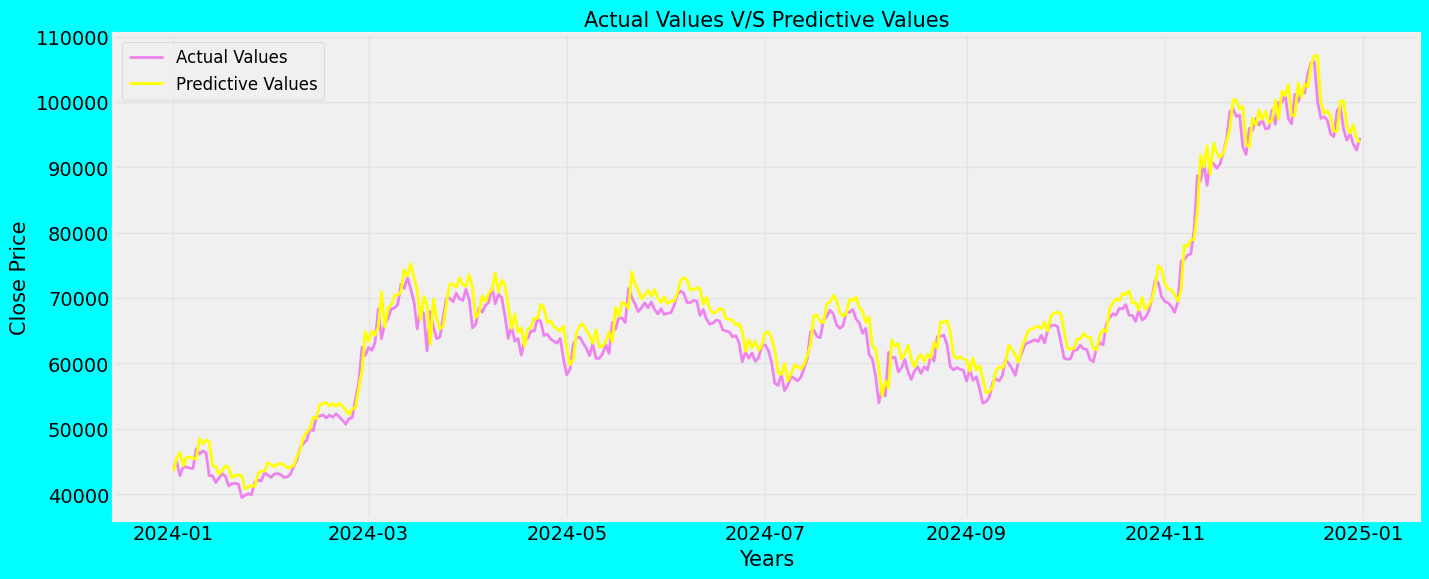

In [37]:
plotting_data = pd.DataFrame(
    {
        'Original': inversed_y_test.flatten(),
        'Prediction': inversed_prediction.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6), facecolor = "cyan")

plt.plot(plotting_data.index, plotting_data['Original'], label = "Actual Values", color = "violet", linewidth = 2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = "Predictive Values", color = "yellow", linewidth = 2)

plt.title("Actual Values V/S Predictive Values", fontsize = 15)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Close Price", fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)

plt.show()

Predict for Future Days

In [38]:
last_100_days = scaled_data[-100:].reshape(1, -1, 1)
future_prediction = []

for _ in range(10):
    next_days = model.predict(last_100_days)
    future_prediction.append(scaler.inverse_transform(next_days))
    last_100_days = np.append(last_100_days[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [39]:
future_prediction

[array([[96014.664]], dtype=float32),
 array([[97434.64]], dtype=float32),
 array([[98925.43]], dtype=float32),
 array([[100462.25]], dtype=float32),
 array([[102017.36]], dtype=float32),
 array([[103554.66]], dtype=float32),
 array([[105036.58]], dtype=float32),
 array([[106428.984]], dtype=float32),
 array([[107703.87]], dtype=float32),
 array([[108840.836]], dtype=float32)]

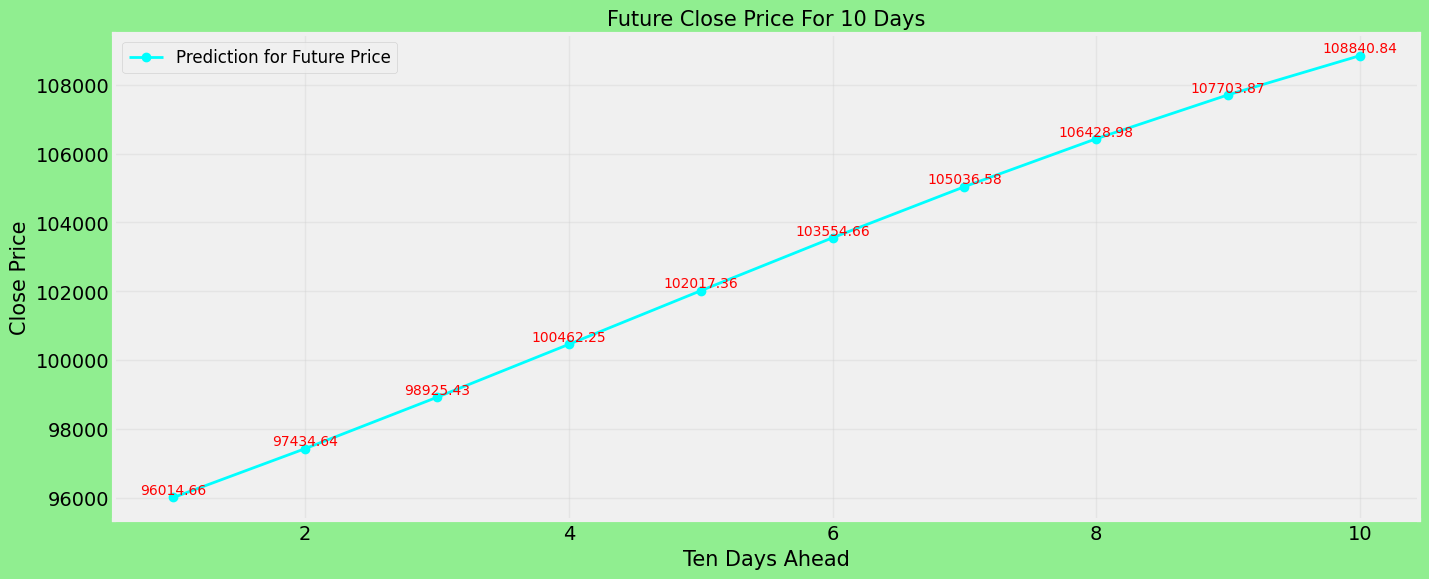

In [41]:
future_prediction = np.array(future_prediction).flatten()

plt.figure(figsize = (15, 6), facecolor = "lightgreen")

plt.plot(range(1, 11), future_prediction, marker = "o", label = "Prediction for Future Price", color = "cyan", linewidth = 2)

for i, val in enumerate(future_prediction):
    plt.text(i + 1, val, f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color = 'red')

plt.title("Future Close Price For 10 Days", fontsize = 15)
plt.xlabel("Ten Days Ahead", fontsize = 15)
plt.ylabel("Close Price", fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)

plt.show()

In [42]:
model.save("model.keras")